In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
data=load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['species']=data.target

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

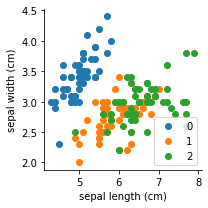

In [11]:
sns.FacetGrid(hue='species',data=df).map(plt.scatter,'sepal length (cm)','sepal width (cm)')
plt.legend()

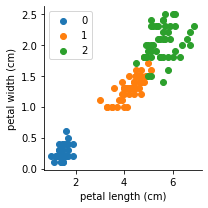

In [12]:
sns.FacetGrid(hue='species',data=df).map(plt.scatter,'petal length (cm)','petal width (cm)')
plt.legend()

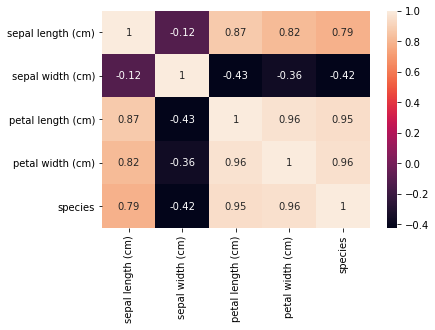

In [13]:
sns.heatmap(df.corr(),annot=True)

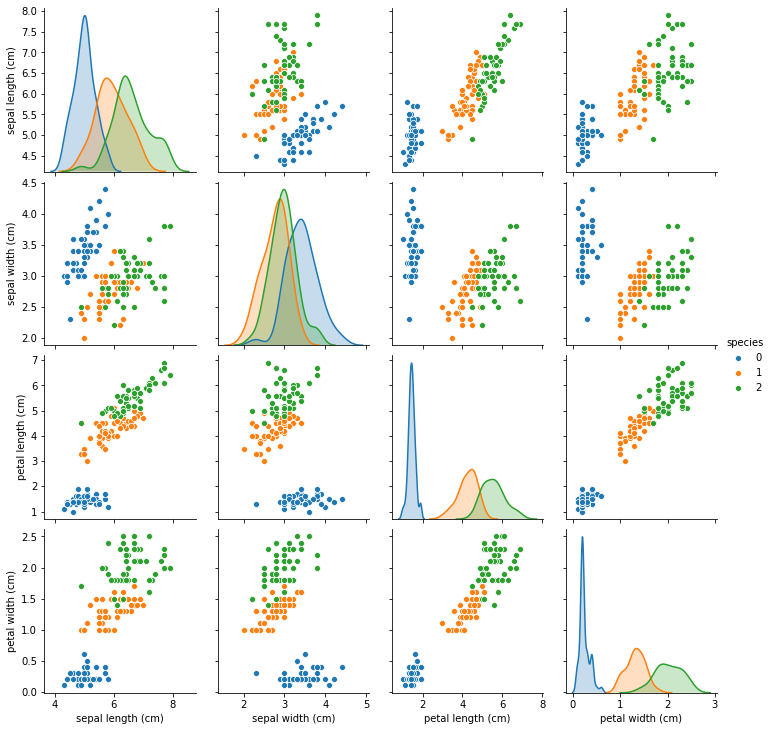

In [14]:
sns.pairplot(df,hue='species')

In [18]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='gini')
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred=tree.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc=accuracy_score(y_test,y_pred)
print(acc)

1.0


In [24]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [25]:
from sklearn.tree import export_graphviz
import pydot

In [28]:
export_graphviz(tree,out_file="decision_tree.dot",feature_names = data.feature_names, class_names=data.target_names,filled = True)

In [29]:
graph, = pydot.graph_from_dot_file('decision_tree.dot')
graph.write_png('decision.png')

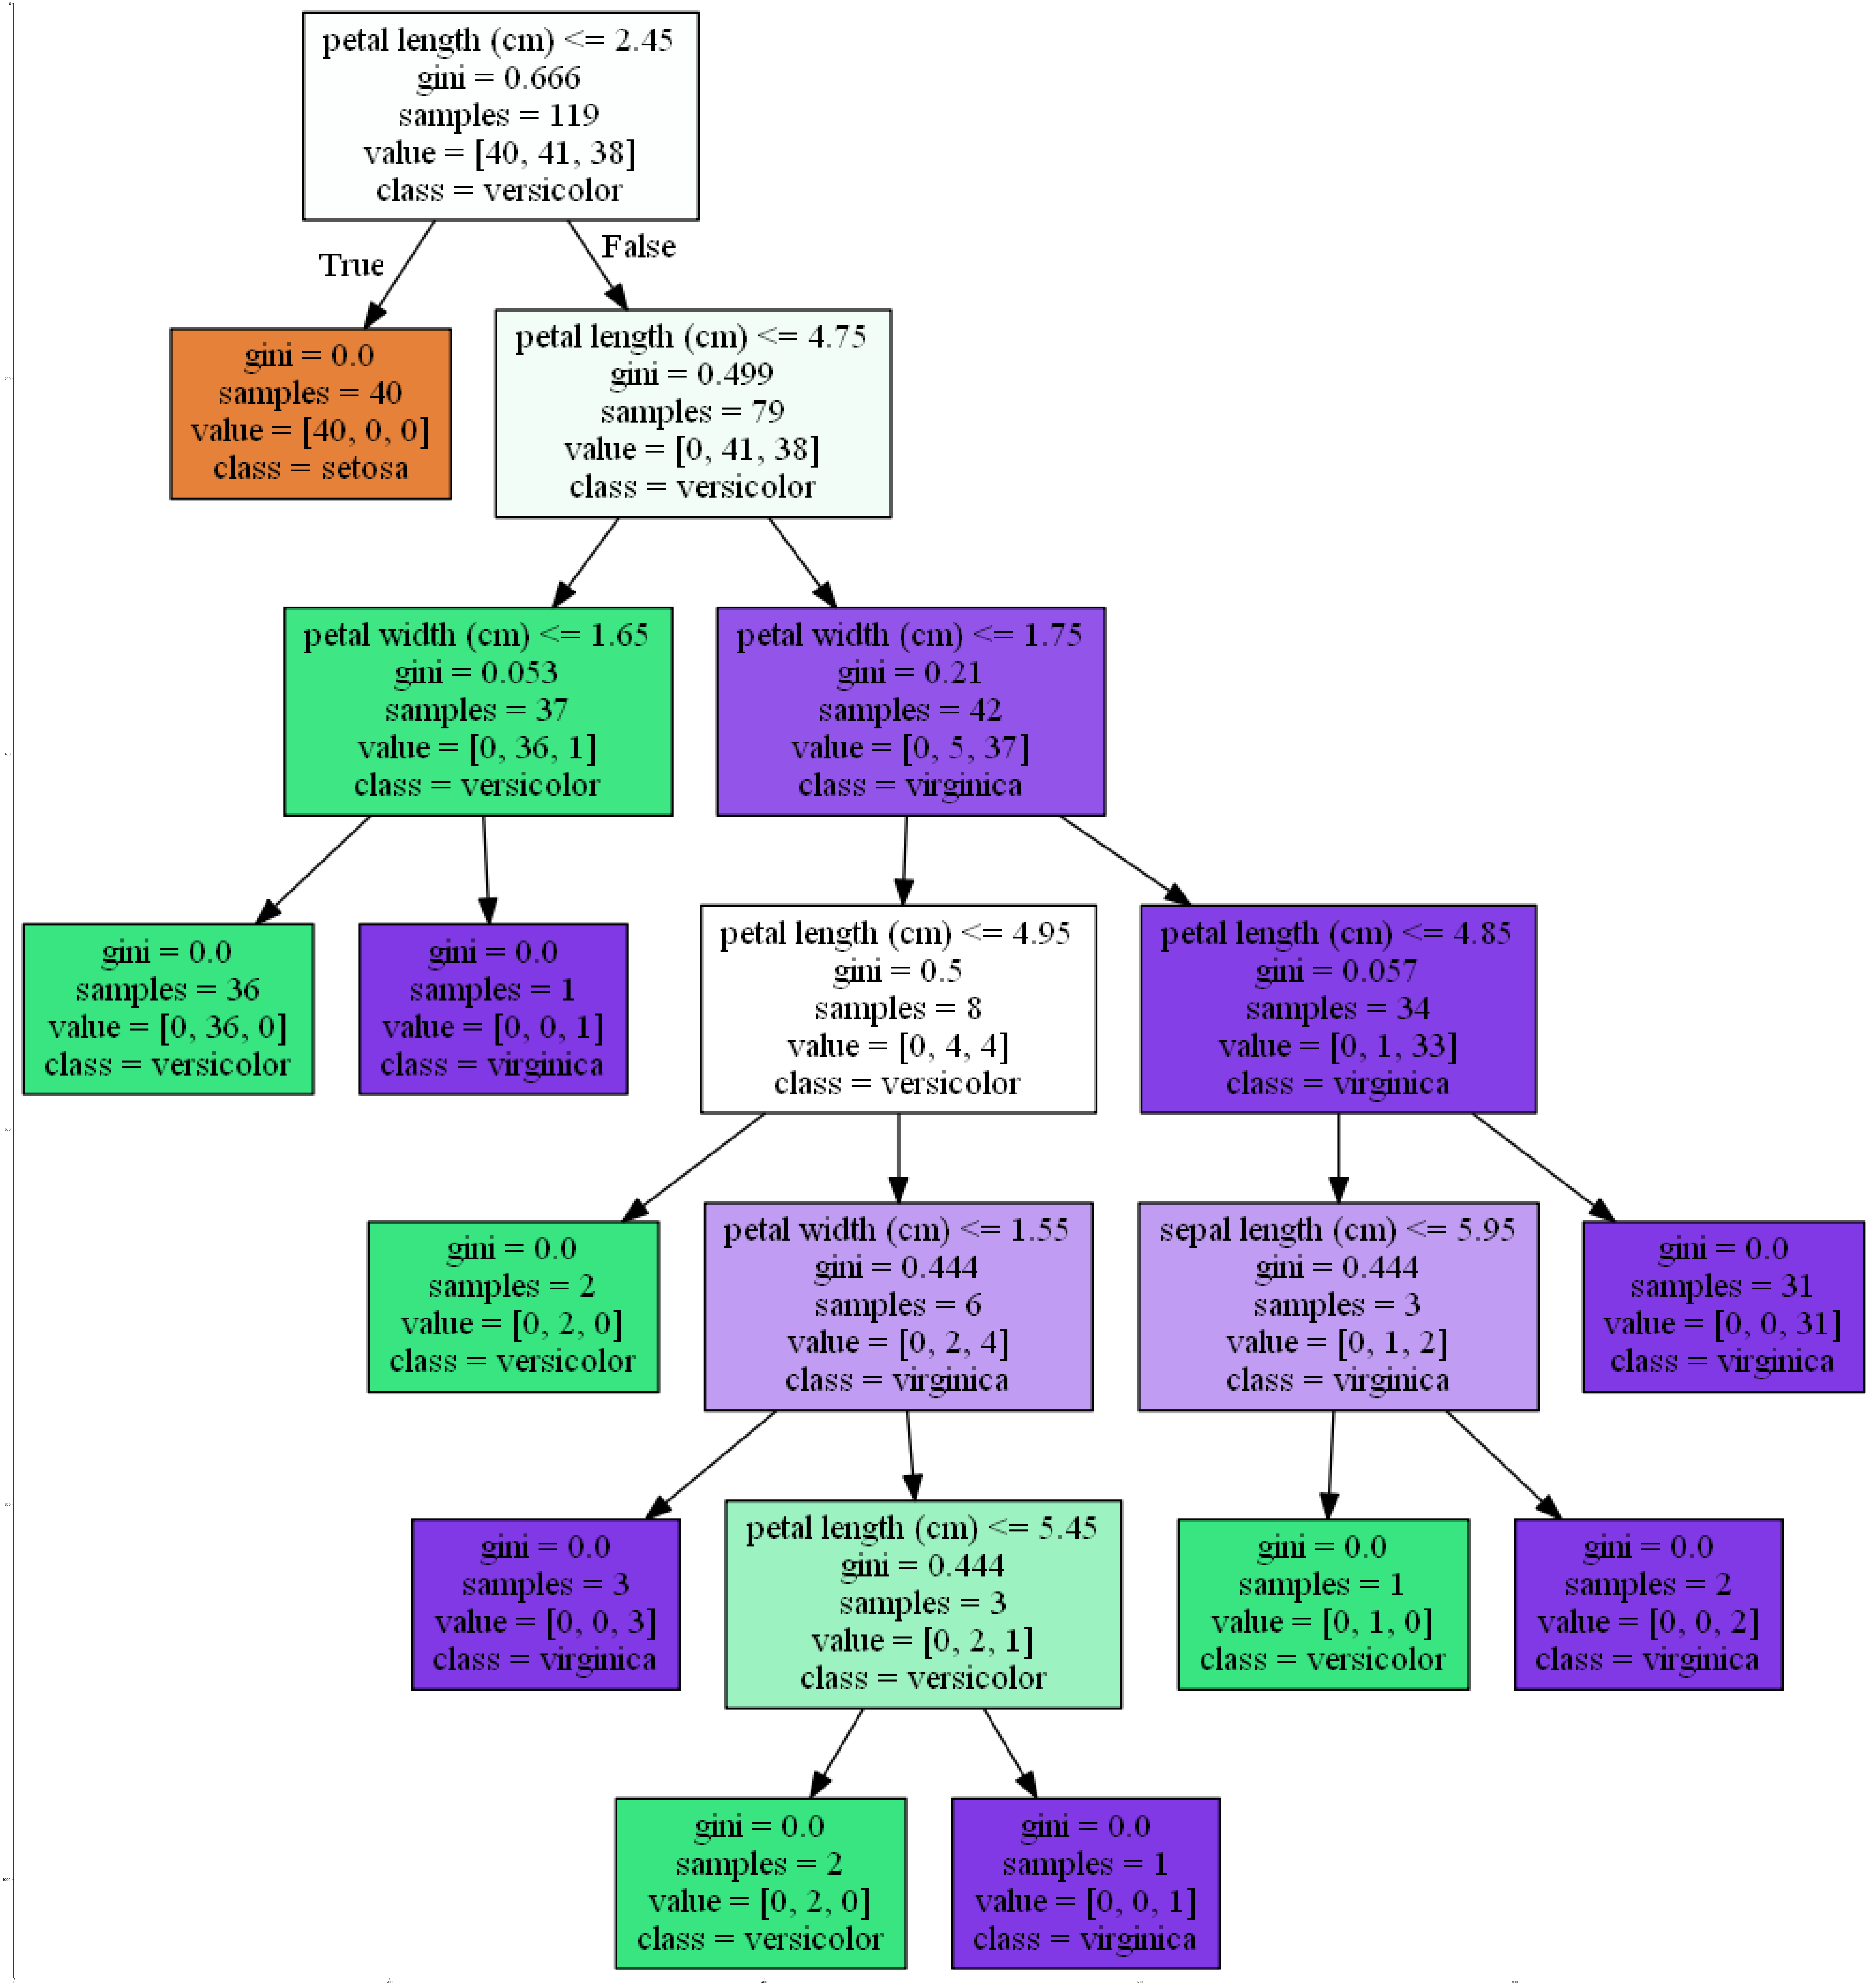

In [32]:
import matplotlib.image as mpimg
img = mpimg.imread('decision.png')
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')